###### Raw dataset @ https://finance.yahoo.com/quote/MSFT/history/

## Importing libraries

In [1]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt 
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

C:\Users\KIIT\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#reading the dataset
df = pd.read_csv('Microsoft stock price.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060396,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062553,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063632,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062014,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060936,47894400
...,...,...,...,...,...,...,...
9449,2023-09-11,337.239990,338.420013,335.429993,337.940002,337.940002,16583300
9450,2023-09-12,335.820007,336.790009,331.480011,331.769989,331.769989,17565500
9451,2023-09-13,331.309998,336.850006,331.170013,336.059998,336.059998,16544400
9452,2023-09-14,339.149994,340.859985,336.570007,338.700012,338.700012,20267000


#### Inspecting dataframe


In [3]:
df.shape

(9454, 7)

In [4]:
df.info() #identifying data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9454 entries, 0 to 9453
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       9454 non-null   object 
 1   Open       9454 non-null   float64
 2   High       9454 non-null   float64
 3   Low        9454 non-null   float64
 4   Close      9454 non-null   float64
 5   Adj Close  9454 non-null   float64
 6   Volume     9454 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 517.1+ KB


In [5]:
df['Date']

0       1986-03-13
1       1986-03-14
2       1986-03-17
3       1986-03-18
4       1986-03-19
           ...    
9449    2023-09-11
9450    2023-09-12
9451    2023-09-13
9452    2023-09-14
9453    2023-09-15
Name: Date, Length: 9454, dtype: object

###### Creating Function to convert string to datetime 

In [6]:
import datetime
def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]),int(split[1]),int(split[2])
    return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-13')
datetime_object

datetime.datetime(1986, 3, 13, 0, 0)

###### Applying the function to the entire dataset for datetime data type

In [7]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9449   2023-09-11
9450   2023-09-12
9451   2023-09-13
9452   2023-09-14
9453   2023-09-15
Name: Date, Length: 9454, dtype: datetime64[ns]

###### removing index number and setting index as date


In [8]:
df.index = df.pop('Date')

In [9]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060396,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062553,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063632,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062014,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060936,47894400
...,...,...,...,...,...,...
2023-09-11,337.239990,338.420013,335.429993,337.940002,337.940002,16583300
2023-09-12,335.820007,336.790009,331.480011,331.769989,331.769989,17565500
2023-09-13,331.309998,336.850006,331.170013,336.059998,336.059998,16544400


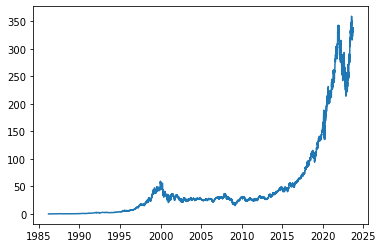

In [10]:
plt.plot(df.index,df['Close'])

#Here, we can see that the stock price kept on increasing from 1986 to 2022(approx.)and there is a drop.
And again increased and a slight drop at the end of the graph in year 2023 .

###### As we are using LSTM model we need to convert this into supervized learning model
#This will be done by making a new function 

In [19]:
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):      
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = nm.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2022-09-17'
windowed_df = df_to_windowed_df(df, 
                                '2022-09-17',       #start_date
                                '2023-09-15',       #end_date
                                n=3)
windowed_df  #windowed_df is a dataframe where colmuns are  Target-3(Open), Target-2(High), Target-1(Low) and Target(Close)

,Target Date,Target-3,Target-2,Target-1,Target
0,2022-09-17,251.990005,252.220001,245.380005,244.740005
1,2022-09-20,245.380005,244.740005,244.520004,242.449997
2,2022-09-21,244.740005,244.520004,242.449997,238.949997
3,2022-09-22,244.520004,242.449997,238.949997,240.979996
4,2022-09-23,242.449997,238.949997,240.979996,237.919998
...,...,...,...,...,...
245,2023-09-11,332.880005,329.910004,334.269989,337.940002
246,2023-09-12,329.910004,334.269989,337.940002,331.769989
247,2023-09-13,334.269989,337.940002,331.769989,336.059998
248,2023-09-14,337.940002,331.769989,336.059998,338.700012


###### Here, 
Target-3(Open), Target-2(High), Target-1(Low) are the inputs.
The Target column is the output 

In [20]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_nm = windowed_dataframe.to_numpy()

  dates = df_as_nm[:, 0]                                                    #date column

  middle_matrix = df_as_nm[:, 1:-1]                                        #Target-3,Target-2,Target-1 columns 
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_nm[:, -1]                                                      #target column

  return dates, X.astype(nm.float32), Y.astype(nm.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((250,), (250, 3, 1), (250,))

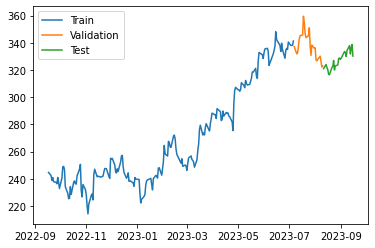

In [21]:
q_80 = int(len(dates) * .8)     #80%
q_90 = int(len(dates) * .9)     #90%

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [22]:
model = Sequential([layers.Input((3, 1)),                 #Layers      
                    layers.LSTM(64),                      #Layers
                    layers.Dense(32, activation='relu'),  #Layers
                    layers.Dense(32, activation='relu'),  #Layers
                    layers.Dense(1)])                     #activation is linear by default

model.compile(loss='mse',                                 #compiling model
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100) #fitting model

Epoch 1/100
7/7 [==============================] - 5s 220ms/step - loss: 73683.4375 - mean_absolute_error: 269.0726 - val_loss: 113919.4062 - val_mean_absolute_error: 337.3793
Epoch 2/100
7/7 [==============================] - 0s 53ms/step - loss: 73462.4688 - mean_absolute_error: 268.6593 - val_loss: 113661.5781 - val_mean_absolute_error: 336.9970
Epoch 3/100
7/7 [==============================] - 0s 34ms/step - loss: 73264.9766 - mean_absolute_error: 268.2911 - val_loss: 113417.1172 - val_mean_absolute_error: 336.6341
Epoch 4/100
7/7 [==============================] - 0s 17ms/step - loss: 73058.8984 - mean_absolute_error: 267.9073 - val_loss: 113141.8594 - val_mean_absolute_error: 336.2250
Epoch 5/100
7/7 [==============================] - 0s 16ms/step - loss: 72807.3359 - mean_absolute_error: 267.4383 - val_loss: 112768.5703 - val_mean_absolute_error: 335.6694
Epoch 6/100
7/7 [==============================] - 0s 17ms/step - loss: 72492.8438 - mean_absolute_error: 266.8478 - val_los

We can see that validation_mean_absolute_error has decreased.

### DATA VISUALIZATION

7/7 [==============================] - 0s 2ms/step


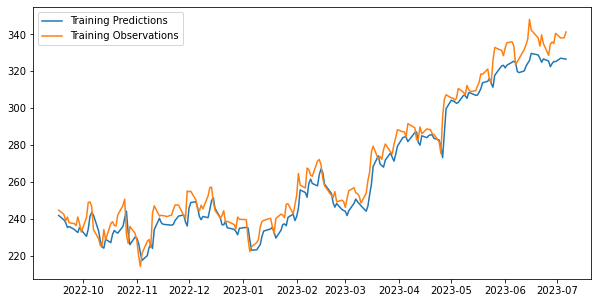

In [32]:
#Training
train_predictions = model.predict(X_train).flatten()

plt.figure(figsize=(10, 5))
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

From the above graph we can see that 'Training Predictions' and 'Training Observations' are close to each other.

1/1 [==============================] - 0s 20ms/step


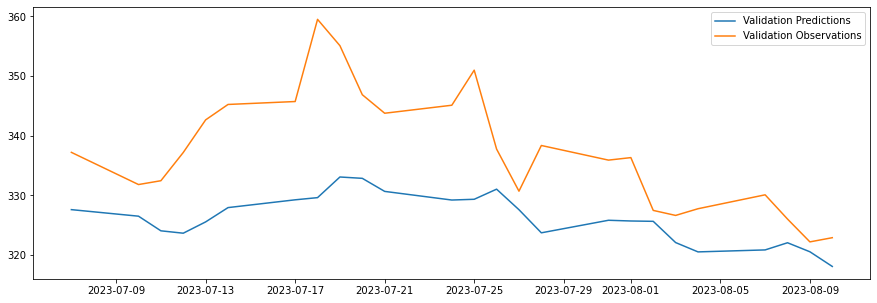

In [35]:
#Validation 
val_predictions = model.predict(X_val).flatten()

plt.figure(figsize=(15, 5))
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

From the above graph we can see that 'Validation Predictions', 'Validation Observations' are quite close to each other.

1/1 [==============================] - 0s 21ms/step


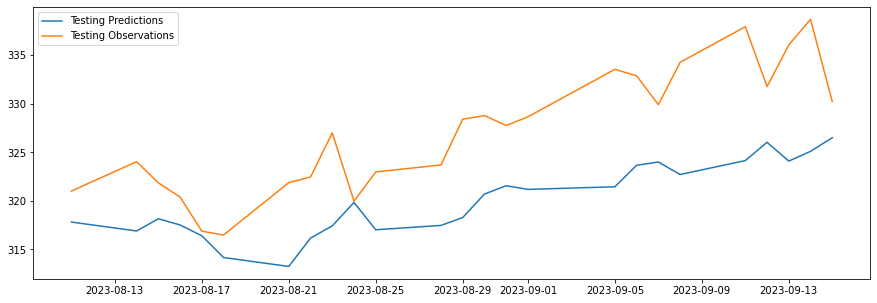

In [37]:
#Test 
test_predictions = model.predict(X_test).flatten()

plt.figure(figsize=(15, 5))
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

From the above graph we can see that 'Testing Predictions', 'Testing Observations' are close to each other at some points.

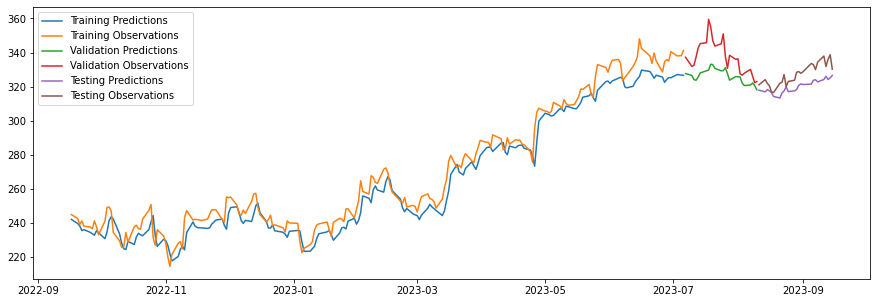

In [38]:
plt.figure(figsize=(15, 5))
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [27]:
from copy import deepcopy #The deepcopy() function from the copy module creates a deep copy of an object. 

In [29]:
recursive_predictions = []                                     #recursive prdiction for future
recursive_dates = nm.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(nm.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 33ms/step


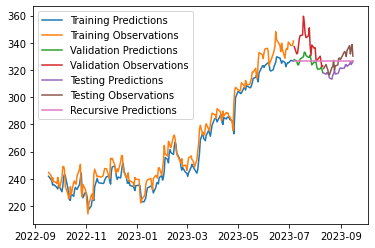

In [30]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])

Therefore, Recursive Prediction model has no idea how to predict in the future. It thinks it will be what it was before.

###### Predicting Stocks is incredibly difficult but there is a trend we analyzed that the stock started to go up.So,this indicates that it is a good Stock to buy.